In [13]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder, StandardScaler
from sklearn.linear_model import LinearRegression
from sklearn.metrics import mean_squared_error, mean_absolute_error, r2_score

# Încărcarea setului de date din fișier Excel
data_path = "/content/drive/MyDrive/Classroom/TIA/ENB2012_data.xlsx"
df = pd.read_excel(data_path)

print("Afișare primele observații/exemple din setul de date:")
print(df.head(), "\n")

# Setul de date conține: X1..X8 și Y1, Y2
# X1 = Relative Compactness
# !X2 = Surface Area!
# !X3 = Wall Area!
# X4 = Roof Area
# X5 = Overall Height
# X6 = Orientation
# X7 = Glazing Area
# X8 = Glazing Area Distribution
# Y1 = Heating Load (țintă)
# Y2 = Cooling Load (nu va fi folosit aici)
# X6 și X8 sunt categorice, restul numerice.
Y = df["Y1"] #tinta
X = df.drop(columns=["Y1", "Y2"])

cat_attribs = ["X6", "X8"] #declaram var categorice
num_attribs = X.drop(columns=cat_attribs) # declaram var numerice

print("Caracteristici numerice:", num_attribs.columns.tolist())
print("Caracteristici categorice:", cat_attribs, "\n")





Afișare primele observații/exemple din setul de date:
     X1     X2     X3      X4   X5  X6   X7  X8     Y1     Y2
0  0.98  514.5  294.0  110.25  7.0   2  0.0   0  15.55  21.33
1  0.98  514.5  294.0  110.25  7.0   3  0.0   0  15.55  21.33
2  0.98  514.5  294.0  110.25  7.0   4  0.0   0  15.55  21.33
3  0.98  514.5  294.0  110.25  7.0   5  0.0   0  15.55  21.33
4  0.90  563.5  318.5  122.50  7.0   2  0.0   0  20.84  28.28 

Caracteristici numerice: ['X1', 'X2', 'X3', 'X4', 'X5', 'X7']
Caracteristici categorice: ['X6', 'X8'] 



In [14]:

# Encodarea caracteristicilor categorice
encoder = OneHotEncoder(sparse_output=False, drop="first")
encoded_matrix = encoder.fit_transform(X[cat_attribs])
encoded_names = encoder.get_feature_names_out(cat_attribs)

cat_df = pd.DataFrame(encoded_matrix, columns=encoded_names, index=X.index)
X_final = pd.concat([num_attribs, cat_df], axis=1)

# Aplicăm StandardScaler
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_final)

# Împărțim datele în train(60%), val(20%) și test(20%)
X_train, X_temp, y_train, y_temp = train_test_split(X_scaled, Y, test_size=0.4, random_state=42)
X_val, X_test, y_val, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=42)

In [15]:
# Antrenăm modelul de regresie liniară pe setul de antrenare
model = LinearRegression()
model.fit(X_train, y_train)

# Predicții pe setul de antrenare
y_train_pred = model.predict(X_train)

# Calculul erorilor pe setul de antrenare
mse_tr = mean_squared_error(y_train, y_train_pred)
mae_tr = mean_absolute_error(y_train, y_train_pred)
rmse_tr = np.sqrt(mse_tr)
r2_tr = r2_score(y_train, y_train_pred)

print("Performanța pe antrenare:")
print(f"  MSE: {mse_tr:.2f}")
print(f"  MAE: {mae_tr:.2f}")
print(f"  RMSE: {rmse_tr:.2f}")
print(f"  R²: {r2_tr:.2f}\n")

Performanța pe antrenare:
  MSE: 7.40
  MAE: 1.95
  RMSE: 2.72
  R²: 0.93



In [16]:

# Predicții pe setul de validare
y_val_pred = model.predict(X_val)

# Erori pe validare
mse_v = mean_squared_error(y_val, y_val_pred)
mae_v = mean_absolute_error(y_val, y_val_pred)
rmse_v = np.sqrt(mse_v)
r2_v = r2_score(y_val, y_val_pred)

print("Performanța pe validare:")
print(f"  MSE: {mse_v:.2f}")
print(f"  MAE: {mae_v:.2f}")
print(f"  RMSE: {rmse_v:.2f}")
print(f"  R²: {r2_v:.2f}\n")

Performanța pe validare:
  MSE: 8.87
  MAE: 2.15
  RMSE: 2.98
  R²: 0.92



In [17]:
# Predicții pe setul de test
y_test_pred = model.predict(X_test)

# Erori pe test
mse_t = mean_squared_error(y_test, y_test_pred)
mae_t = mean_absolute_error(y_test, y_test_pred)
rmse_t = np.sqrt(mse_t)
r2_t = r2_score(y_test, y_test_pred)

print("Performanța pe test:")
print(f"  MSE: {mse_t:.2f}")
print(f"  MAE: {mae_t:.2f}")
print(f"  RMSE: {rmse_t:.2f}")
print(f"  R²: {r2_t:.2f}\n")

Performanța pe test:
  MSE: 7.89
  MAE: 2.04
  RMSE: 2.81
  R²: 0.92



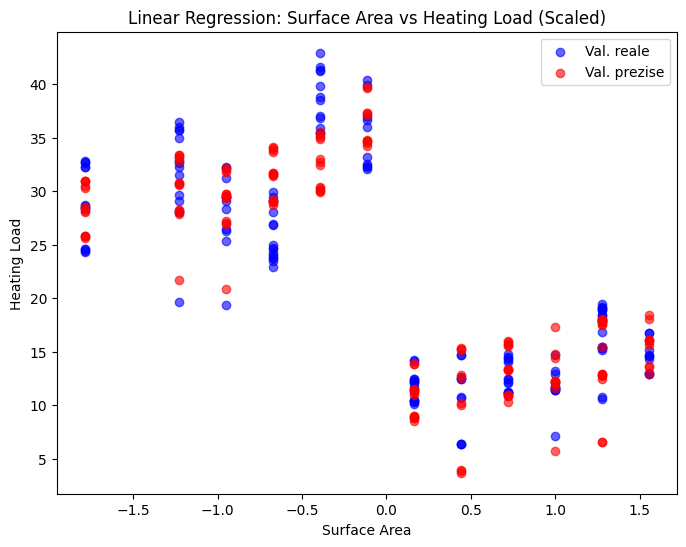

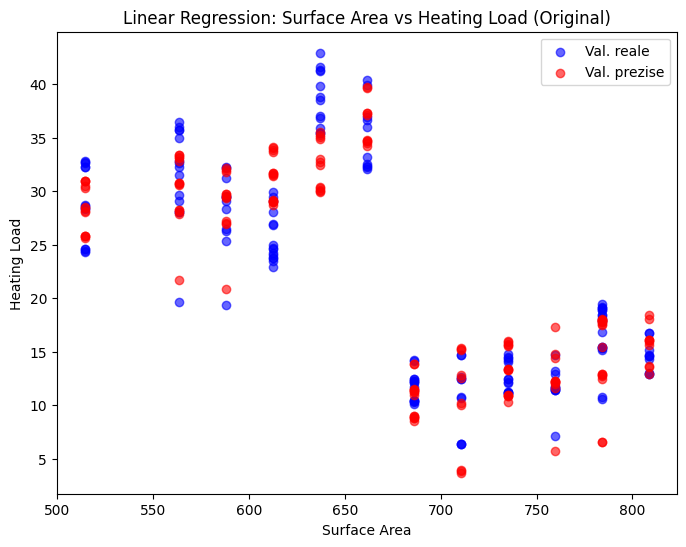

In [18]:
# Vizualizare (Date Scalate): Surface Area vs Heating Load
# Surface Area = X2
surface_area_idx = list(num_attribs.columns).index("X2")  # am scalat valorile
X_test_surface_scaled = X_test[:, surface_area_idx] #ia coloana scalata
#In graficul scalat, Surface Area este in unitati standardizate (aproape de 0)
plt.figure(figsize=(8, 6))
plt.scatter(X_test_surface_scaled, y_test, color='blue', alpha=0.6, label='Val. reale')
plt.scatter(X_test_surface_scaled, y_test_pred, color='red', alpha=0.6, label='Val. prezise')
plt.xlabel("Surface Area")
plt.ylabel("Heating Load")
plt.title("Linear Regression: Surface Area vs Heating Load (Scaled)")
plt.legend()
plt.show()

# Vizualizare (Date Nescalate): Surface Area vs Heating Load
X_test_unscaled = scaler.inverse_transform(X_test) #restauram valorile nescalate
X_test_surface_orig = X_test_unscaled[:, surface_area_idx] #ia aceeasi coloana ca la datele scalate, dar resturata la scara originala
#In graficul nescalat, Surface Area este in unitatile originale
plt.figure(figsize=(8, 6))
plt.scatter(X_test_surface_orig, y_test, color='blue', alpha=0.6, label='Val. reale')
plt.scatter(X_test_surface_orig, y_test_pred, color='red', alpha=0.6, label='Val. prezise')
plt.xlabel("Surface Area")
plt.ylabel("Heating Load")
plt.title("Linear Regression: Surface Area vs Heating Load (Original)")
plt.legend()
plt.show()

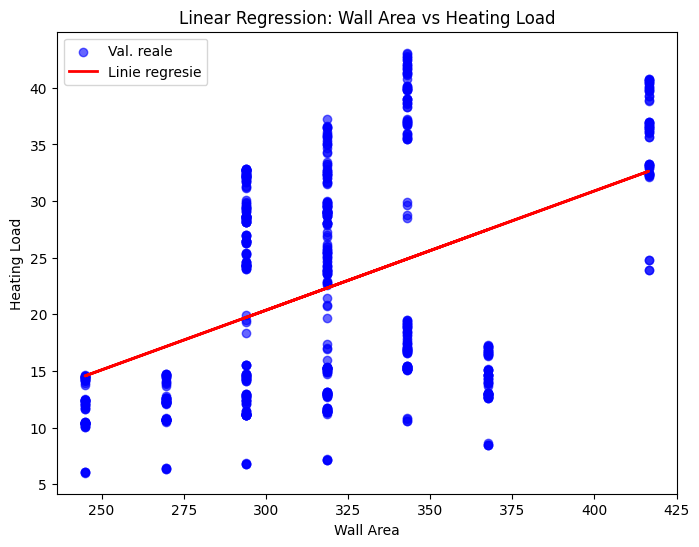

Ecuația dreptei pentru Wall Area vs Heating Load: y = 0.11 * x + -11.26



In [19]:

# Regresie univariată: Wall Area (X3) vs Y1
X_wall_area = df[['X3']].values
y_heating = df['Y1'].values

single_lin_model = LinearRegression()
single_lin_model.fit(X_wall_area, y_heating)
y_wall_predictions = single_lin_model.predict(X_wall_area)

plt.figure(figsize=(8, 6))
plt.scatter(X_wall_area, y_heating, color='blue', alpha=0.6, label='Val. reale')
plt.plot(X_wall_area, y_wall_predictions, color='red', linewidth=2, label='Linie regresie')
plt.xlabel('Wall Area')
plt.ylabel('Heating Load')
plt.title('Linear Regression: Wall Area vs Heating Load')
plt.legend()
plt.show()

# Afișare ecuație dreaptă de regresie pentru Wall Area
wall_coef = single_lin_model.coef_[0]
wall_intercept = single_lin_model.intercept_
print(f"Ecuația dreptei pentru Wall Area vs Heating Load: y = {wall_coef:.2f} * x + {wall_intercept:.2f}\n")